In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/data
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/data/dataset.zip"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/data


In [2]:
import os
from PIL import Image
import glob, sys, numpy as np
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/Colab Notebooks/data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir,'test')

In [207]:
categories = ["adidas","converse","nike"]
classes = len(categories)

list1 = []
list2 = []
list3 = []
list4 = []

for idx, name in enumerate(categories):
    
    #데이터 라벨링.

    train_image_dir = train_dir + "/" + name
    test_image_dir = test_dir + "/" + name

    train_files = glob.glob(train_image_dir + "/*.jpg")
    test_files = glob.glob(test_image_dir + "/*.jpg")


    for i, f in enumerate(train_files):
        
        img = Image.open(f)
        img = img.convert('RGB')
        data = np.array(img)
        list1.append(data)
        X_train = np.array(list1)
        list2.append(idx)
        y_train = np.array(list2)

    for i, f in enumerate(test_files):
        img = Image.open(f)
        img = img.convert('RGB')
        data = np.array(img)
        list3.append(data)
        X_test = np.array(list3)
        list4.append(idx)
        y_test = np.array(list4)

        

In [208]:
X_train = X_train.reshape(X_train.shape[0],240,240,3) 
X_test = X_test.reshape(X_test.shape[0],240,240,3) 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

print(y_train[:10])
print(y_test[:10])


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3), input_shape = (240, 240, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.summary()


# 모델을 컴파일합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기 종료 
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15)

# 모델을 실행합니다.

history = model.fit(x = X_train, y = y_train, batch_size = 30, epochs = 50, validation_split = 0.15, verbose = 1, callbacks = early_stopping_callback ) 

print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))



Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 119, 119, 16)     0         
 g2D)                                                            
                                                                 
 dropout_125 (Dropout)       (None, 119, 119, 16)      0         
                                                                 
 conv2d_92 (Conv2D)          (None, 117, 117, 32)      4640      
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                                            
                                                                 
 dropout_126 (Dropout)       (None, 58, 58, 32)      

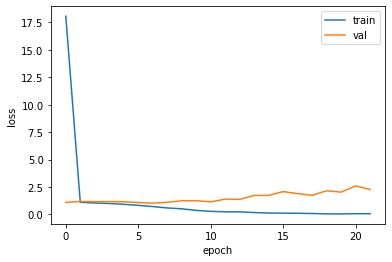

In [210]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

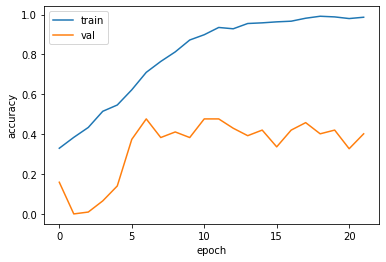

In [211]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [212]:
# 한번만 실행해야됨. 
y_test=np.argmax(y_test, axis=1)

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [214]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)

print(y_pred)

4/4 [==============================] - 0s 17ms/step
[1 1 0 0 0 0 2 0 2 1 1 1 0 0 2 2 1 0 2 1 0 2 0 0 0 0 0 2 1 1 1 0 0 0 2 1 1
 0 2 0 1 2 1 1 1 1 0 1 2 0 1 1 1 1 1 1 0 1 0 1 0 2 2 1 1 2 1 0 2 1 2 1 1 2
 1 1 2 0 0 0 2 1 2 2 2 2 2 1 2 2 0 2 1 0 1 2 0 2 0 0 2 1 1 0 1 2 1 0 1 2 2
 1 1 1]


In [215]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[18 12  8]
 [ 7 22  9]
 [10 12 16]]


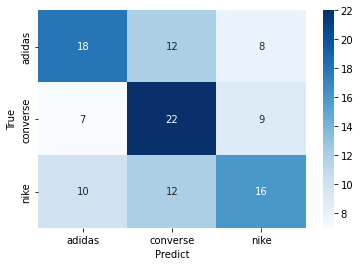

In [216]:
import seaborn as sns

ax = sns.heatmap(cm,annot = True, fmt = "d",cmap= 'Blues')
plt.xlabel("Predict")
plt.ylabel("True")
plt.xticks([0.5,1.5,2.5],['adidas', 'converse','nike'])
plt.yticks([0.5,1.5,2.5],['adidas', 'converse','nike'])
plt.show()